In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
airbnb_data = pd.read_csv("../Data/listings.csv")

c:\users\sunil\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
columns_interest_airbnb = ['street', 'neighbourhood','zipcode', 'latitude', 'longitude', 'property_type', 'accommodates', 
                               'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 
                               'number_of_reviews']
airbnb_data_req = airbnb_data[['street', 'neighbourhood','zipcode', 'latitude', 'longitude', 'property_type', 'accommodates', 
                               'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 
                               'number_of_reviews']]

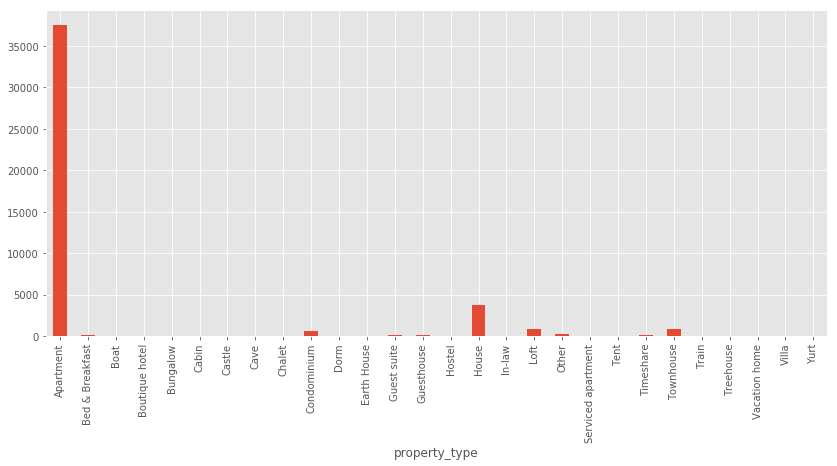

In [5]:
plt.style.use('ggplot')
prop_type= airbnb_data_req.groupby('property_type')['property_type'].count()
prop_type.plot(kind='bar',figsize=(14,6))
plt.show()
#Thus, as the distribution is skewed, we will only be using the property-type with entries as 'apartment'

In [6]:
def splitZip(zipcode):
    zips = zipcode.split("-")
    zipsDot = zips[0].split(".")
    zipsN = zipsDot[0].split("\n")
    return zipsN[0]

In [7]:
def clean_airbnb(airbnb_data_req):
    index_drop = airbnb_data_req[airbnb_data_req['zipcode'].isnull()].index.tolist()
    airbnb_data_req = airbnb_data_req.drop(index_drop)
    airbnb_data_req = airbnb_data_req.reset_index(drop = True)
    
    airbnb_data_req["bathrooms"].fillna(0, inplace = True)
    airbnb_data_req["bedrooms"].fillna(0, inplace = True)
    airbnb_data_req["beds"].fillna(0, inplace = True)
    airbnb_data_req["neighbourhood"].fillna("", inplace = True)
    
    airbnb_data_req["price"] = airbnb_data_req["price"].str.replace('$', '')
    airbnb_data_req["price"] = airbnb_data_req["price"].str.replace(',', '')
    airbnb_data_req["price"] = airbnb_data_req["price"].astype(float)
    
    airbnb_data_req["zipcode"] = airbnb_data_req["zipcode"].astype(str)
    
    airbnb_data_req["zipcode"] = airbnb_data_req["zipcode"].apply(splitZip)
    airbnb_data_req= airbnb_data_req[airbnb_data_req['zipcode']!='1m']
    
    airbnb_data_req = airbnb_data_req[airbnb_data_req['property_type'] == 'Apartment']
    
    return airbnb_data_req

In [6]:
from cleaning import clean_airbnb

In [7]:
airbnb_data_req = clean_airbnb(airbnb_data)
airbnb_data_req.shape

(36987, 17)

In [9]:
airbnb_data_req.head()

,street,neighbourhood,zipcode,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,"Queens, NY, United States",Astoria,11105,40.774142,-73.916246,Apartment,2,1.0,0.0,1.0,110.0,6,6,0
1,"City Island, NY, United States",City Island,10464,40.849775,-73.786609,Apartment,3,1.0,1.0,1.0,125.0,3,21,21
5,"Bronx, NY, United States",City Island,10464,40.851980,-73.789304,Apartment,7,1.0,2.0,5.0,150.0,2,1125,3
8,"Bronx, NY, United States",City Island,10464,40.853491,-73.788607,Apartment,4,1.0,1.0,1.0,200.0,7,29,0
10,"Bronx, NY, United States",City Island,10464,40.852582,-73.787621,Apartment,2,1.0,1.0,2.0,115.0,3,30,49


In [10]:
airbnb_data_req = airbnb_data_req[airbnb_data_req['property_type'] == 'Apartment']

In [11]:
grouped_zipcode = airbnb_data_req.groupby('zipcode')
grouped_zipcode.mean()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
zipcode,,,,,,,,,,
10000,40.759796,-73.993743,2.000000,1.000000,1.000000,1.000000,200.000000,1.000000,1.125000e+03,10.000000
10001,40.748644,-73.993985,3.126582,1.127848,1.005063,1.673418,217.410127,4.541772,3.888630e+03,24.448101
10002,40.717713,-73.989113,2.615699,1.070319,1.120196,1.409648,168.650859,4.283729,6.847400e+02,20.528209
10003,40.730213,-73.987606,2.774926,1.077986,1.058243,1.451135,207.410661,3.902270,6.871599e+02,19.139191
10004,40.705386,-74.013571,2.894737,1.087719,1.052632,1.526316,172.228070,11.421053,6.326140e+02,12.754386
10005,40.705432,-74.008402,2.521008,1.067227,0.806723,1.369748,178.025210,6.714286,8.394958e+02,9.512605
10006,40.708207,-74.013045,3.014493,1.101449,1.086957,1.637681,199.782609,5.449275,7.473333e+02,11.202899
10007,40.714496,-74.008689,3.787879,1.681818,1.606061,2.030303,393.393939,3.000000,8.246364e+02,1.939394
10009,40.725726,-73.981484,2.666954,1.068162,1.124245,1.412425,162.646247,3.314064,7.882908e+02,20.261432


In [48]:
from sklearn import preprocessing
#from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn import linear_model

In [65]:
x_train = airbnb_data_req[['bedrooms','bathrooms','accommodates','beds','number_of_reviews', 'latitude', 'longitude']]
y_train = airbnb_data_req['price'].values

#reg = linear_model.Lasso(alpha=.1)
#reg = ElasticNet()
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

y_pred = reg.predict(x_train)

r2_score(y_train,y_pred)

0.14380869544352204